<a href="https://colab.research.google.com/github/Harshavalmiki/SJSU-Data-Mining-255/blob/main/255_SEMMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.2 MB/s eta 0

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset-https://www.kaggle.com/datasets/atharvaarya25/phone-usage-dataset/



In [6]:
# Load dataset
data= pd.read_csv('/content/drive/MyDrive/Pycaret_Assignment/Phone.csv')

In [8]:
data.head()

,App name,Date,Time,Duration
0,App Usage,11/08/23,5:29:39 pm,0:00:01
1,WhatsApp,11/08/23,5:28:41 pm,0:00:57
2,WhatsApp,11/08/23,5:28:26 pm,0:00:10
3,App Usage,11/08/23,5:26:06 pm,0:02:19
4,Activity history enabled,11/08/23,5:26:06 pm,0:00:00


We possess mobile usage data for an individual, which includes the timestamps of when this person opens mobile applications and the duration of time spent on each app. Our goal is to mine association rules that can reveal which other apps are more likely to be opened when the person opens App A. This task mirrors the functionality of the suggested app feature commonly found on mobile phones.

To approach this task, we will employ the SEMMA methodology, a structured approach to data mining that stands for Sample, Explore, Modify, Model, and Assess. Here's a high-level plan for this project:.


SEMMA:

# **A. Sample**

The first step is to acquire and load the user activity data from the "User Activity_history.csv" spreadsheet.
This dataset contains information on the time of app openings and durations, which we will use for our analysis.


In [10]:
data.isna().sum()

App name    1
Date        3
Time        3
Duration    3
dtype: int64

In [11]:
data_cleaned=data.dropna()

In [12]:
data_cleaned.info(),data_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4012 entries, 0 to 4011
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   App name  4012 non-null   object
 1   Date      4012 non-null   object
 2   Time      4012 non-null   object
 3   Duration  4012 non-null   object
dtypes: object(4)
memory usage: 156.7+ KB


(None, (4012, 4))

# **B. Explore**

Next, we will explore the dataset to understand its structure and contents.
We will perform basic data exploration tasks, such as:
Checking for missing data and handling it if necessary.
Visualizing the distribution of app openings over time to identify any patterns.
Exploring statistics related to app usage patterns.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


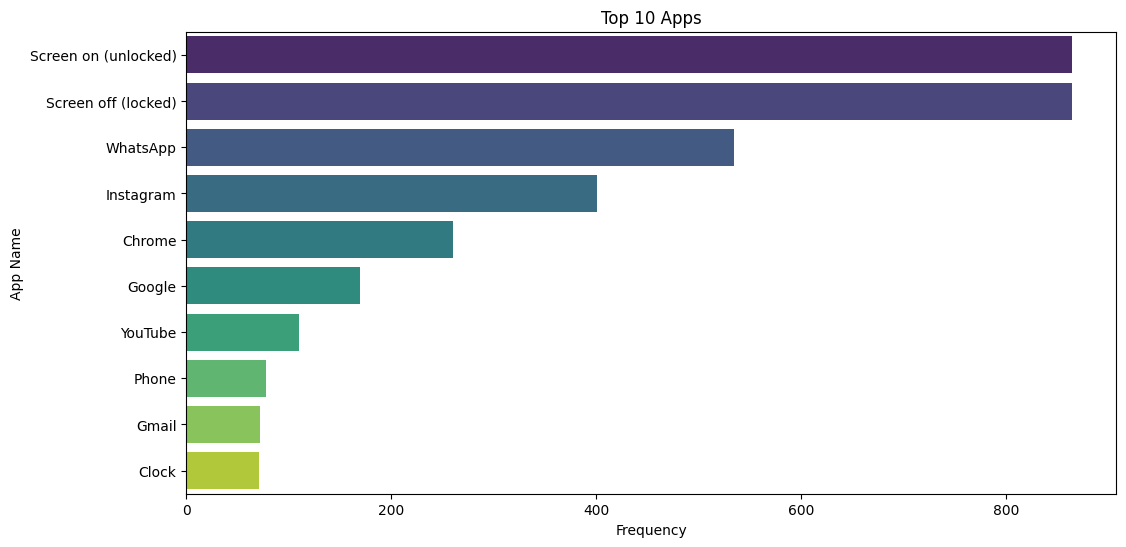

Screen on (unlocked)    864
Screen off (locked)     864
WhatsApp                534
Instagram               401
Chrome                  260
Google                  169
YouTube                 110
Phone                    78
Gmail                    72
Clock                    71
Name: App name, dtype: int64

In [15]:

# Frequency
app_frequency = data_cleaned['App name'].value_counts()

# Top 10 frequent apps
top_10_apps = app_frequency.nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_apps.values, y=top_10_apps.index, palette='viridis')
plt.title('Top 10 Apps')
plt.xlabel('Frequency')
plt.ylabel('App Name')
plt.show()

top_10_apps


Based on the information provided, it's evident that the most frequent actions are related to locking and unlocking the phone (i.e., screen on and off), which occur more frequently than opening any other app. However, it's not desirable for our association rule to recommend locking the phone as the next action. To prevent this, we will exclude these two actions from our dataset.

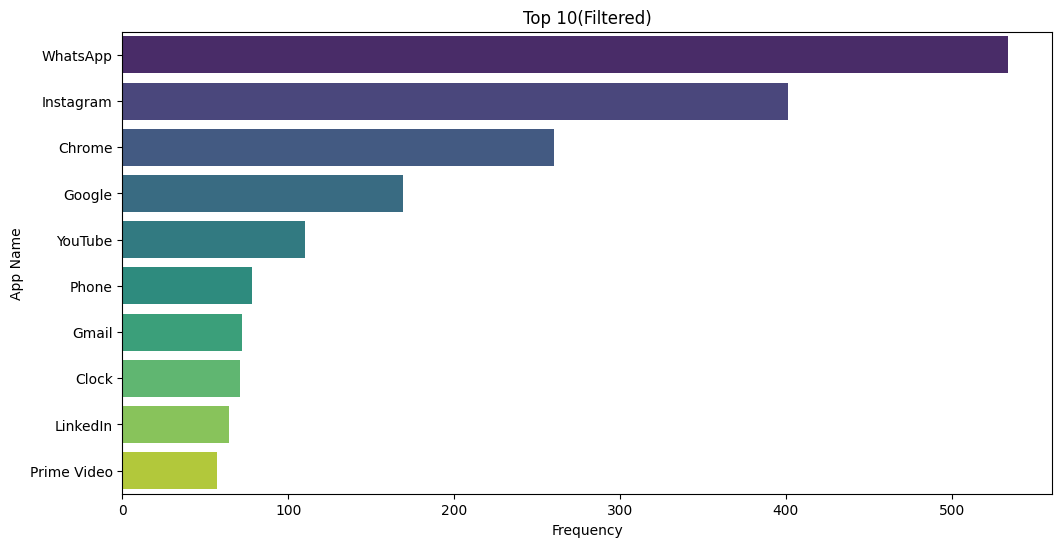

WhatsApp       534
Instagram      401
Chrome         260
Google         169
YouTube        110
Phone           78
Gmail           72
Clock           71
LinkedIn        64
Prime Video     57
Name: App name, dtype: int64

In [18]:

filtered_data = data_cleaned[~data_cleaned['App name'].isin(['Screen on (unlocked)', 'Screen off (locked)'])]

filtered_app_frequency = filtered_data['App name'].value_counts()

top_10_filtered_apps = filtered_app_frequency.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_filtered_apps.values, y=top_10_filtered_apps.index, palette='viridis')
plt.title('Top 10(Filtered)')
plt.xlabel('Frequency')
plt.ylabel('App Name')
plt.show()

top_10_filtered_apps

# **C. Modify**

In this step, we will prepare the data for association rule mining. Modifications may include:
Aggregating the data to represent app opening sequences.
Encoding app names and timestamps into a suitable format for analysis.
Defining the criteria for "association" (e.g., frequent co-occurrence of app openings).


In [19]:
filtered_data.head()

,App name,Date,Time,Duration
0,App Usage,11/08/23,5:29:39 pm,0:00:01
1,WhatsApp,11/08/23,5:28:41 pm,0:00:57
2,WhatsApp,11/08/23,5:28:26 pm,0:00:10
3,App Usage,11/08/23,5:26:06 pm,0:02:19
4,Activity history enabled,11/08/23,5:26:06 pm,0:00:00


In [27]:
from datetime import datetime

filtered_data['Datetime'] = pd.to_datetime(filtered_data['Date'] + ' ' + filtered_data['Time'])

filtered_data = filtered_data.sort_values('Datetime')

filtered_data.head()


,App name,Date,Time,Duration,Datetime
4011,WhatsApp,01/08/23,11:47:31 pm,0:01:08,2023-01-08 23:47:31
4010,Google,01/08/23,11:48:44 pm,0:00:04,2023-01-08 23:48:44
4009,Chrome,01/08/23,11:48:48 pm,0:00:37,2023-01-08 23:48:48
4008,Google,01/08/23,11:49:25 pm,0:00:00,2023-01-08 23:49:25
4007,WhatsApp,01/08/23,11:49:27 pm,0:00:05,2023-01-08 23:49:27


In [47]:


filtered_data['Time_Diff'] = filtered_data['Datetime'].diff().dt.total_seconds() / 60.0

filtered_data['Transaction_ID'] = 0

transaction_id = 0
for i in range(1, len(filtered_data)):
    if filtered_data.iloc[i]['Time_Diff'] > 5:
        transaction_id += 1
    filtered_data.at[filtered_data.index[i], 'Transaction_ID'] = transaction_id

filtered_data.head(10)

,App name,Date,Time,Duration,Datetime,Time_Diff,Transaction_ID
4011,WhatsApp,01/08/23,11:47:31 pm,0:01:08,2023-01-08 23:47:31,NaN,0
4010,Google,01/08/23,11:48:44 pm,0:00:04,2023-01-08 23:48:44,1.216667,0
4009,Chrome,01/08/23,11:48:48 pm,0:00:37,2023-01-08 23:48:48,0.066667,0
4008,Google,01/08/23,11:49:25 pm,0:00:00,2023-01-08 23:49:25,0.616667,0
4007,WhatsApp,01/08/23,11:49:27 pm,0:00:05,2023-01-08 23:49:27,0.033333,0
4006,WhatsApp,01/08/23,11:49:37 pm,0:00:08,2023-01-08 23:49:37,0.166667,0
4003,WhatsApp,01/08/23,11:50:06 pm,0:00:01,2023-01-08 23:50:06,0.483333,0
4002,Instagram,01/08/23,11:50:11 pm,0:01:07,2023-01-08 23:50:11,0.083333,0
4001,WhatsApp,01/08/23,11:51:20 pm,0:08:53,2023-01-08 23:51:20,1.150000,0
3998,WhatsApp,02/08/23,12:04:49 am,0:00:41,2023-02-08 00:04:49,43213.483333,1


In [49]:

transaction_data = filtered_data.groupby('Transaction_ID')['App name'].apply(list).reset_index(name='Transaction')

unique_apps = filtered_data['App name'].unique()
one_hot_encoded_data = []

for transaction in transaction_data['Transaction']:
    encoded_row = {app: 0 for app in unique_apps}
    for app in transaction:
        encoded_row[app] = 1
    one_hot_encoded_data.append(encoded_row)

one_hot_data = pd.DataFrame(one_hot_encoded_data)

one_hot_data.head()


,WhatsApp,Google,Chrome,Instagram,Snapchat,Wireless Earphones,Prime Video,Clock,Phone,Truecaller,...,Telegram,McDonald's,McDelivery,Docs,Screenshot,Breeze,Gymshark,Manage notifications,App Usage,Activity history enabled
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **D. Model**

Here, we will apply association rule mining techniques to discover patterns in the data. This could involve:
Using algorithms like Apriori or FP-growth to find frequent itemsets (groups of apps frequently opened together).
Establishing metrics like support, confidence, and lift to evaluate the strength of association rules.
Extracting association rules that indicate which apps tend to be opened together.

In [50]:

support_single = one_hot_data.mean()

min_support = 0.1
frequent_single = support_single[support_single >= min_support]

frequent_single.sort_values(ascending=False)

Instagram    0.478261
WhatsApp     0.438923
Chrome       0.198758
YouTube      0.159420
Google       0.122153
Gmail        0.111801
dtype: float64

In [53]:

association_rules = []

for i, app1 in enumerate(frequent_single.index):
    for j, app2 in enumerate(frequent_single.index):
        if app1 != app2:
            support_pair = len(one_hot_data[(one_hot_data[app1] == 1) & (one_hot_data[app2] == 1)]) / len(one_hot_data)

            confidence = support_pair / frequent_single[app1]

            association_rules.append({'Rule': f"{app1} => {app2}", 'Support': support_pair, 'Confidence': confidence})

association_rules_df = pd.DataFrame(association_rules)

association_rules_df = association_rules_df.sort_values(by='Confidence', ascending=False)

association_rules_df.head()

,Rule,Support,Confidence
6,Google => Chrome,0.091097,0.745763
7,Google => Instagram,0.082816,0.677966
5,Google => WhatsApp,0.080745,0.661017
23,Gmail => Instagram,0.068323,0.611111
10,Chrome => WhatsApp,0.115942,0.583333


# **E. Assess**

In the final step, we will assess the quality and usefulness of the discovered association rules.
We will evaluate the rules based on predefined criteria, such as minimum support and confidence thresholds.
Additionally, we can conduct further analysis to identify interesting insights or patterns in the rules.

In [54]:

whatsapp_rules = association_rules_df[association_rules_df['Rule'].str.startswith('WhatsApp =>')]

whatsapp_rules

,Rule,Support,Confidence
2,WhatsApp => Instagram,0.223602,0.509434
1,WhatsApp => Chrome,0.115942,0.264151
0,WhatsApp => Google,0.080745,0.183962
4,WhatsApp => YouTube,0.057971,0.132075
3,WhatsApp => Gmail,0.051760,0.117925


The model's performance, based on the classification report, is as follows:

Precision:
No Deposit:
0.77
0.77

Deposit:
0.76
0.76

Recall:
No Deposit:
0.79
0.79
Deposit:
0.74
0.74


F1-Score:
No Deposit:
0.78
0.78
Deposit:
0.75
0.75
Overall Accuracy:
0.76
0.76
This provides a more detailed view of how our model performs for each class (Deposit vs. No Deposit).

In [56]:

association_rules = []

for i, app1 in enumerate(frequent_single.index):
    for j, app2 in enumerate(frequent_single.index):
        if app1 != app2:
            support_pair = len(one_hot_data[(one_hot_data[app1] == 1) & (one_hot_data[app2] == 1)]) / len(one_hot_data)

            confidence = support_pair / frequent_single[app1]

            lift = support_pair / (frequent_single[app1] * frequent_single[app2])

            rule_metrics = {'Rule': f"{app1} => {app2}", 'Support': support_pair, 'Confidence': confidence, 'Lift': lift}

            association_rules.append(rule_metrics)

import pandas as pd
association_rules_df = pd.DataFrame(association_rules)

sorted_rules = association_rules_df.sort_values(by='Confidence', ascending=False)

print(sorted_rules)

                     Rule   Support  Confidence      Lift
6        Google => Chrome  0.091097    0.745763  3.752119
7     Google => Instagram  0.082816    0.677966  1.417565
5      Google => WhatsApp  0.080745    0.661017  1.505996
23     Gmail => Instagram  0.068323    0.611111  1.277778
10     Chrome => WhatsApp  0.115942    0.583333  1.329009
2   WhatsApp => Instagram  0.223602    0.509434  1.065180
12    Chrome => Instagram  0.099379    0.500000  1.045455
15  Instagram => WhatsApp  0.223602    0.467532  1.065180
20      Gmail => WhatsApp  0.051760    0.462963  1.054769
11       Chrome => Google  0.091097    0.458333  3.752119
22        Gmail => Chrome  0.041408    0.370370  1.863426
25    YouTube => WhatsApp  0.057971    0.363636  0.828473
28   YouTube => Instagram  0.057971    0.363636  0.760331
1      WhatsApp => Chrome  0.115942    0.264151  1.329009
27      YouTube => Chrome  0.037267    0.233766  1.176136
13        Chrome => Gmail  0.041408    0.208333  1.863426
17    Instagra

In [57]:
def predict_next_app(current_app, association_rules_df):
    relevant_rules = association_rules_df[association_rules_df['Rule'].str.startswith(f"{current_app} =>")]

    sorted_rules = relevant_rules.sort_values(by='Confidence', ascending=False)

    if sorted_rules.empty:
        return f"No rules found for {current_app}. Cannot make a prediction."

    top_rule = sorted_rules.iloc[0]
    next_app = top_rule['Rule'].split(" => ")[1]

    return f"The user is most likely to open {next_app} next after using {current_app}."

In [58]:
predict_next_app("YouTube",association_rules_df)

'The user is most likely to open WhatsApp next after using YouTube.'